## Deuflhard Function

In [14]:
using Pkg
Pkg.activate("../../.")
using Globtim
using DynamicPolynomials, DataFrames
using ProgressLogging
using CairoMakie
CairoMakie.activate!

  Activating project at `~/globtim`


activate! (generic function with 1 method)

In [15]:
# Constants and Parameters
const n, a, b = 2, 7, 5
const scale_factor = a / b  # maybe it should be a parameter.
f = Deuflhard # Objective function

Deuflhard (generic function with 1 method)

In [16]:
d = 20 # Initial Degree 
SMPL = 120 # Number of samples
center = [0.0, 0.0]
TR = test_input(f,
                dim=n,
                center=[0.0, 0.0],
                GN=SMPL,
                sample_range=scale_factor,
                )
pol_cheb = Constructor(TR, d, basis=:chebyshev)
pol_lege = Constructor(TR, d, basis=:legendre);


current L2-norm: 0.010014082771037736
current L2-norm: 0.008254557761133752


In [22]:
@polyvar(x[1:n]) # Define polynomial ring 
real_pts_cheb = solve_polynomial_system(
    x, n, d, pol_cheb.coeffs;
    basis=pol_cheb.basis,
    precision=pol_cheb.precision,
    normalized=false,
    power_of_two_denom=pol_cheb.power_of_two_denom
)

real_pts_lege = solve_polynomial_system(
    x, n, d, pol_lege.coeffs;
    basis=pol_lege.basis,
    precision=pol_lege.precision,
    normalized=pol_lege.normalized)

df_cheb = process_crit_pts(real_pts_cheb, f, TR)
df_lege = process_crit_pts(real_pts_lege, f, TR)

Tracking 361 paths...   1%|▏                            |  ETA: 0:04:54



Tracking 361 paths... 100%|█████████████████████████████| Time: 0:00:01
  # paths tracked:                  361
  # non-singular solutions (real):  361 (15)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         361 (15)


Row,x1,x2,z
,Float64,Float64,Float64
1,-0.507129,0.917159,0.283545
2,-0.917159,0.507129,0.283545
3,0.121472,0.121472,4.06007
4,-0.121472,-0.121472,4.06007
5,0.917159,-0.507129,0.283545
6,0.507129,-0.917159,0.283545
7,0.256313,-1.01632,1.28942e-6
8,0.741179,-0.741179,5.82587e-8
9,-0.461153,-0.461153,2.47016


In [23]:
using Optim
df_cheb, df_min_cheb = analyze_critical_points(f, df_cheb, TR, tol_dist=0.05);
df_lege, df_min_lege = analyze_critical_points(f, df_lege, TR, tol_dist=0.05);

Processing point 1 of 15
Optimization has converged within bounds: ✓
Processing point 2 of 15
Optimization has converged within bounds: ✓
Processing point 3 of 15
Optimization has converged within bounds: ✓
Processing point 4 of 15
Optimization has converged within bounds: ✓
Processing point 5 of 15
Optimization has converged within bounds: ✓
Processing point 6 of 15
Optimization has converged within bounds: ✓
Processing point 7 of 15
Optimization has converged within bounds: ✓
Processing point 8 of 15
Optimization has converged within bounds: ✓
Processing point 9 of 15
Optimization has converged within bounds: ✓
Processing point 10 of 15
Optimization has converged within bounds: ✓
Processing point 11 of 15
Optimization has converged within bounds: ✓
Processing point 12 of 15
Optimization has converged within bounds: ✓
Processing point 13 of 15
Optimization has converged within bounds: ✓
Processing point 14 of 15
Optimization has converged within bounds: ✓
Processing point 15 of 15
Opt

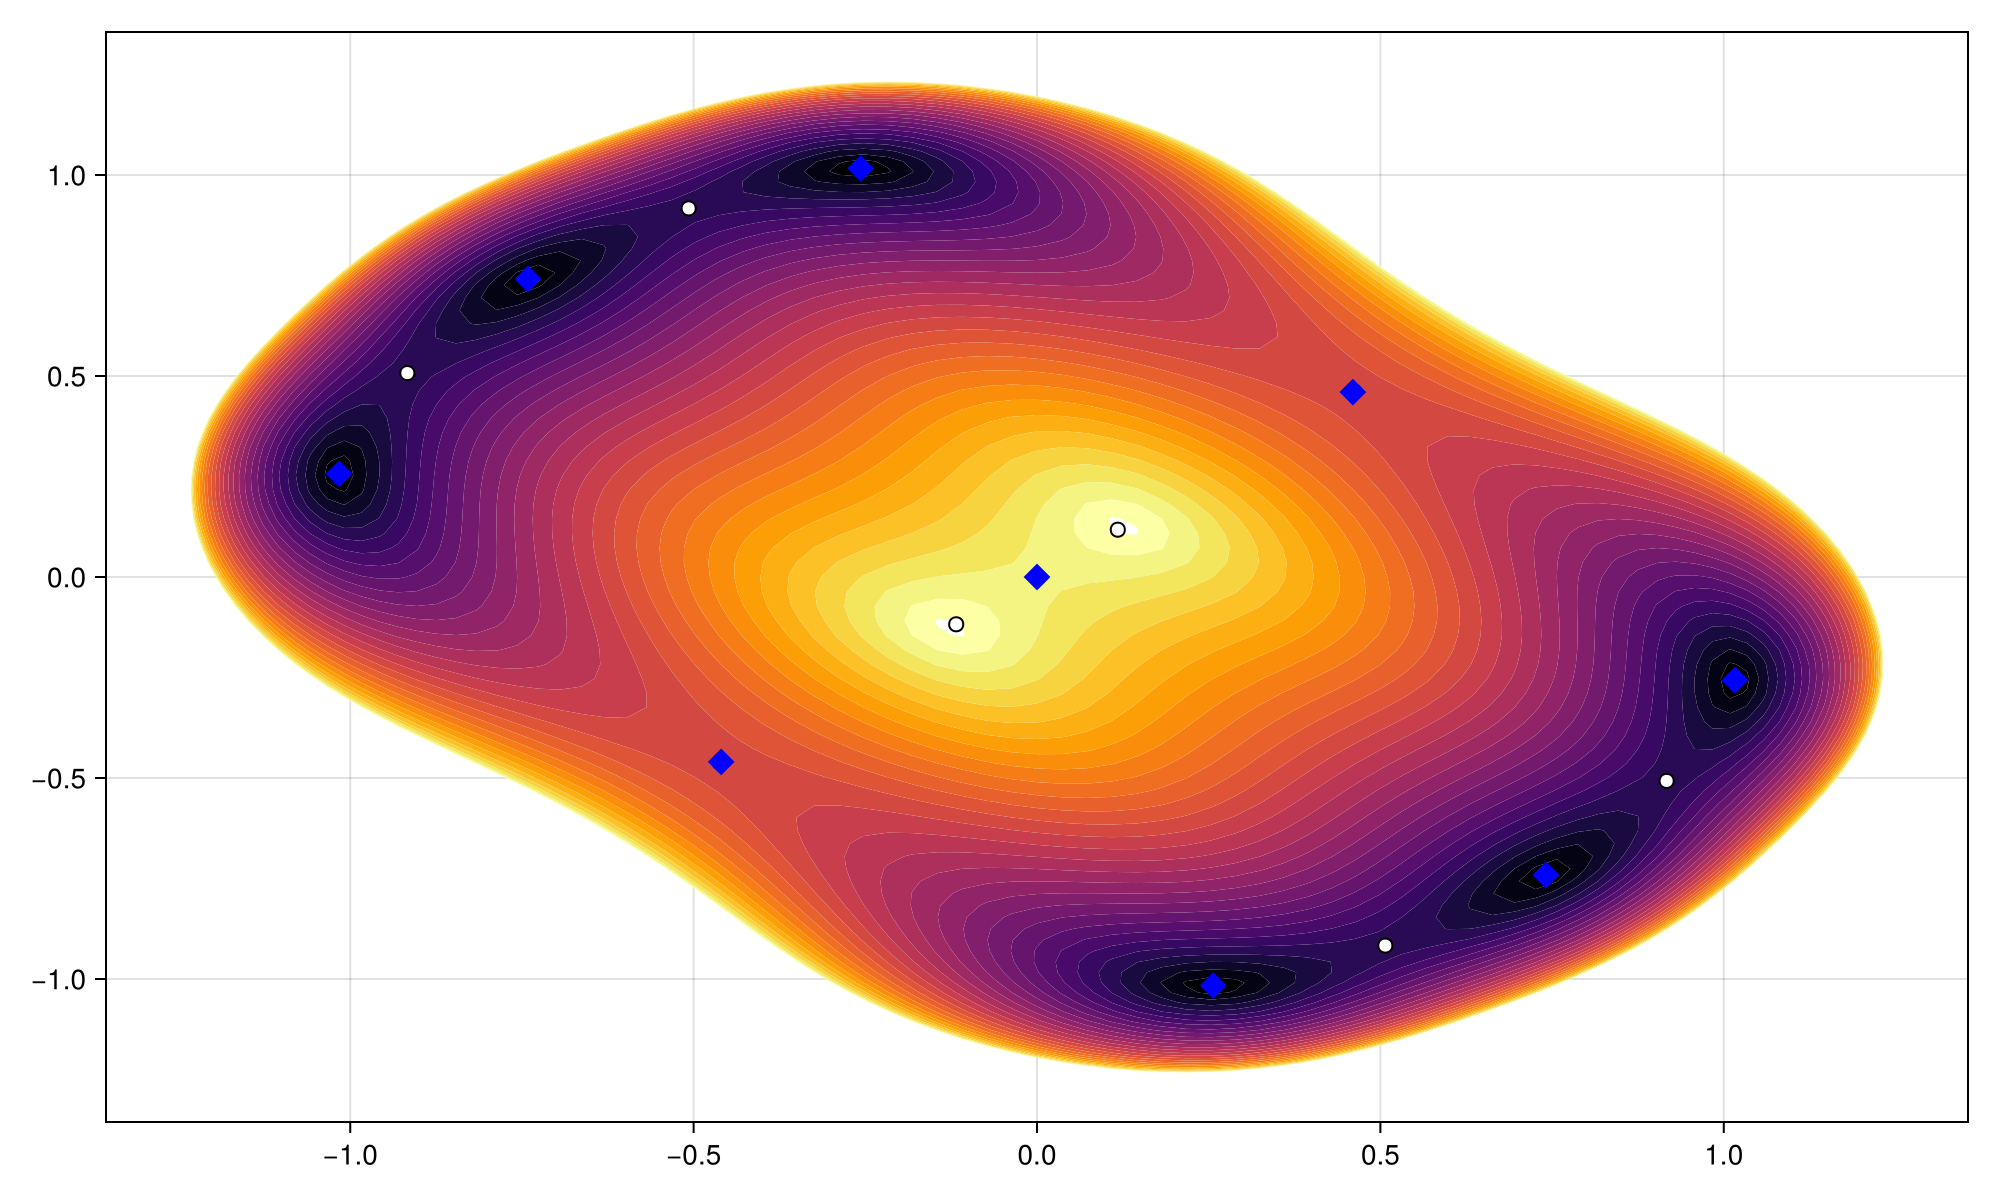

In [24]:
fig_1 = cairo_plot_polyapprox_levelset(pol_cheb, TR, df_cheb, df_min_cheb, chebyshev_levels=true)

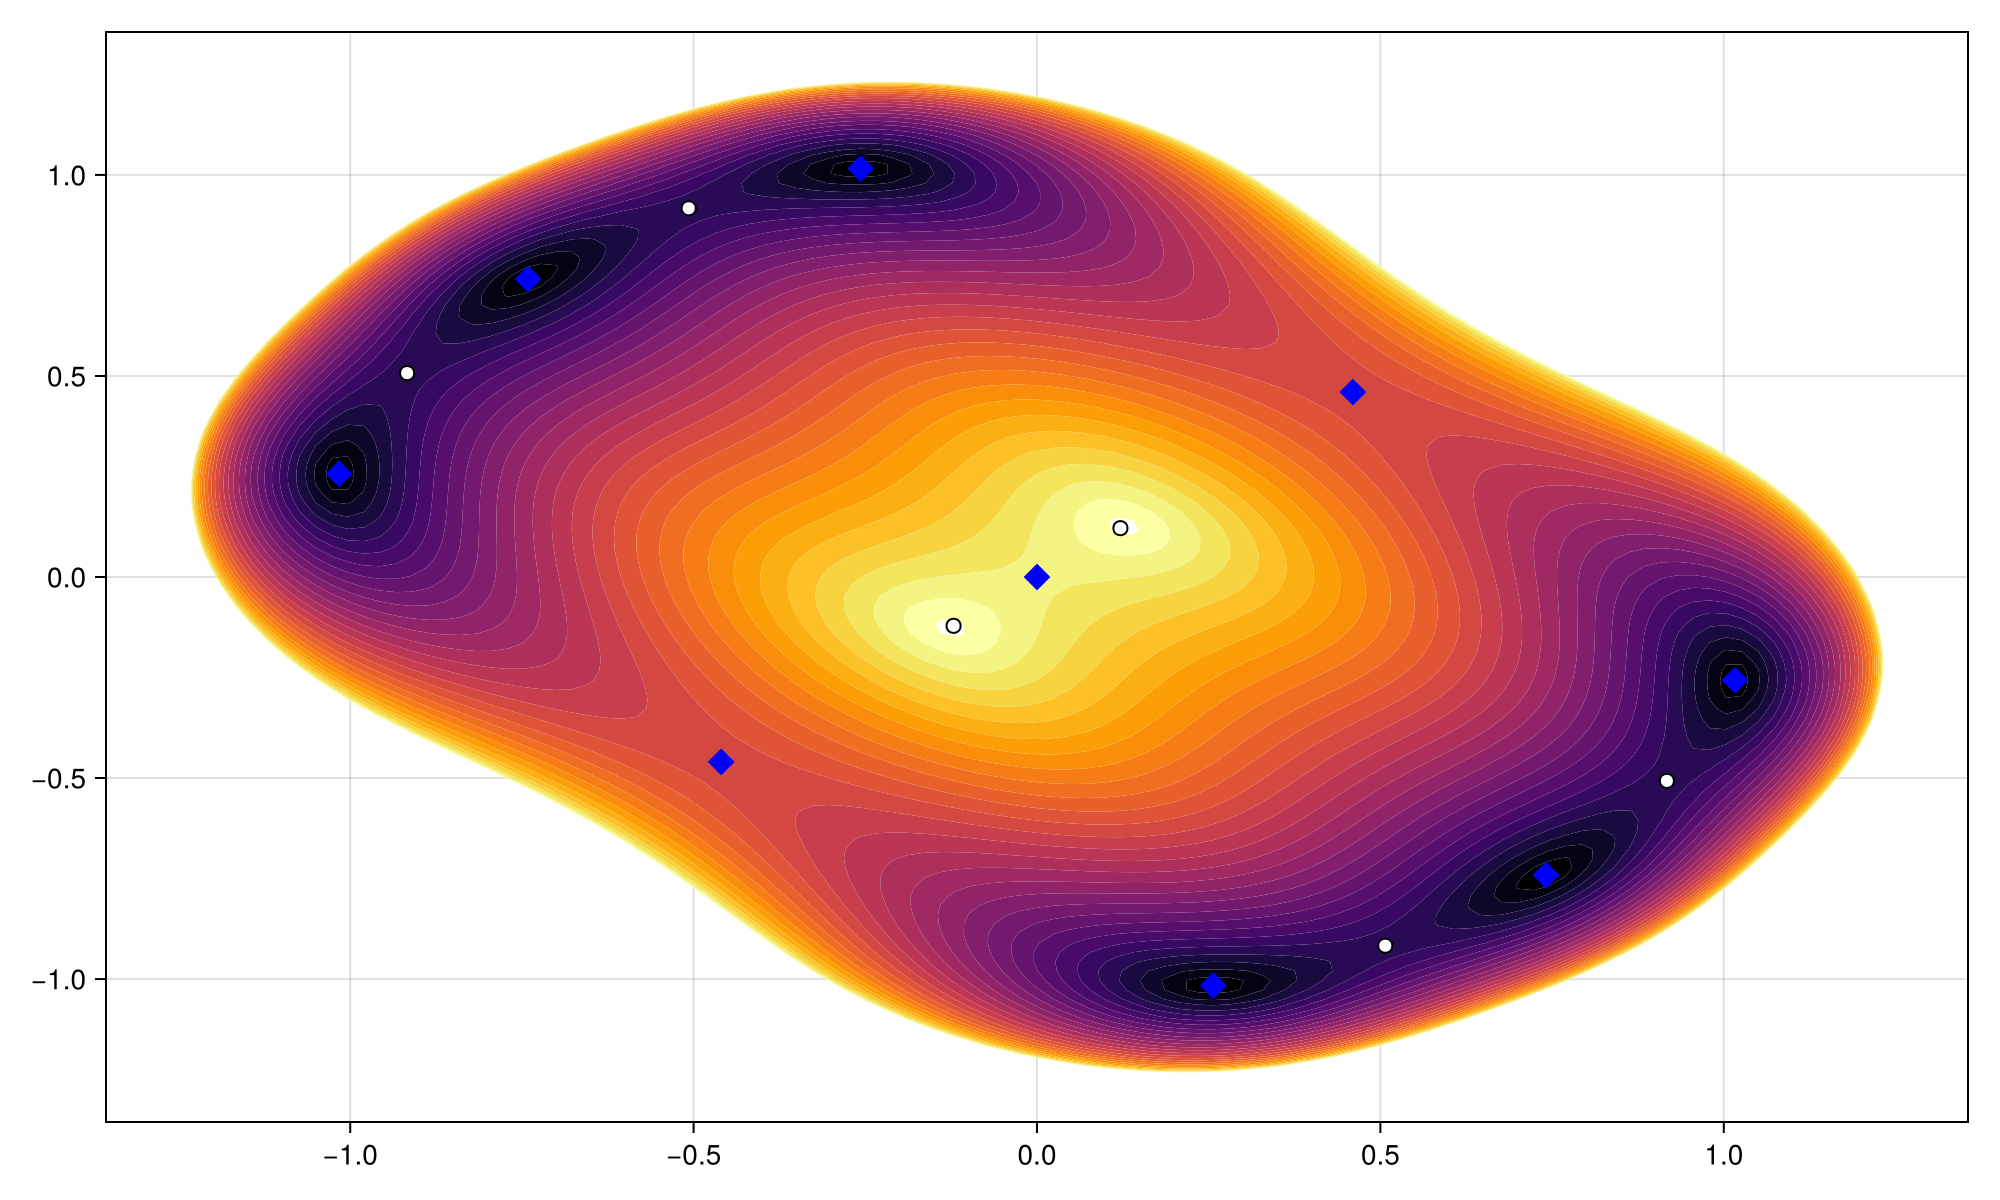

In [25]:
fig_2 = cairo_plot_polyapprox_levelset(pol_lege, TR, df_lege, df_min_lege, chebyshev_levels=true)

In [21]:
# x1_range = range(-1, 1, length=100)
# x2_range = range(-1, 1, length=100)
# z1 = [f([x1_val, x2_val]) for x1_val in x1_range, x2_val in x2_range];
# fig_3 = Figure()
# ax = Axis3(fig_3[1, 1], xlabel="x₁", ylabel="x₂", zlabel="", azimuth=0.1π, elevation=π / 6)
# surface!(ax, x1_range, x2_range, z1)
# display(fig_3)
println("Chebyshev: ", pol_cheb.precision)

Chebyshev: RationalPrecision
